# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Eka Yulia Putri
- **Email:** m281d4kx3308@bangkit.academy
- **ID Dicoding:** ekayulia_putri

## Menentukan Pertanyaan Bisnis

1. Apakah ada korelasi antara kondisi cuaca dan aktivitas penggunaan sepeda?
2. Apakah terdapat perbedaan yang signifikan dalam frekuensi penggunaan sepeda antara hari kerja, hari libur, dan hari biasa?
3. Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?
4. Bagaimana perbandingan tren penggunaan sepeda antara pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

Sebelumnya, karena kita menggunakan Google Colab untuk mengeksekusi dataset Bike-sharing-dataset.zip. Oleh karena itu, kita perlu mengakses Google Drive terlebih dahulu.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Setelah mengakses Google Drive kita harus mengimport semua library yang kita butuhkan untuk mengerjakan proyek ini.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Karena sebelumnya dataset kita masih berupa dalam file Zip. Kita harus mengekstraknya terlebih dahulu. Setelah diekstrak dapat dilihat bahwa terdapat 2 data yaitu day.csv dan hour.csv


In [3]:
#Unzip Bike-sharing-dataset.zip
!unzip -q /content/drive/MyDrive/Bike-sharing-dataset.zip
!ls

day.csv  drive	hour.csv  Readme.txt  sample_data


## Data Wrangling


Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih Bike Sharing Dataset, maka saya mengimpor file day.csv dan hour.csv

### Gathering Data

Pertama, kita akan load day.csv terlebih dahulu

In [5]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kemudian, kita akan load hour.csv

In [6]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

 Memeriksa data Day.csv

1. Cek tipe data

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari yang dapat dilihat di atas, ada satu jenis data berdasarkan kolomnya yang tidak sesuai. Sehingga data yang perlu diperbaiki adalah: dteday -> datetime

2. Cek Missing Value

In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari yang dapat dilihat di atas, pada tabel day.csv tidak terdapat missing values.

3. Cek duplicate data

In [9]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Dapat kita simpulkan bahwa tabel day.csv tidak terdapat duplicate data.

4. Cek tabel Statistik pada data

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan tabel diatas, pada data day.csv tidak terdapat keanehan.

Kemudian kita akan memeriksa data Hour.csv

1. Cek tipe data

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari yang dapat dilihat di atas, ada satu jenis data berdasarkan kolomnya yang tidak sesuai. Sehingga data yang perlu diperbaiki adalah: dteday -> datetime

2. Cek Missing Value

In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari yang dapat dilihat di atas, pada tabel hour.csv tidak terdapat missing values.

3. Cek duplicate data

In [13]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


Dapat kita simpulkan bahwa tabel hour.csv tidak terdapat duplicate data.

4. Cek tabel Statistik pada data

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan tabel diatas, pada data hour.csv tidak terdapat keanehan.

### Cleaning Data

1. Menghapus tabel hour_df

Setelah memeriksa data day_df san hour_df. kita akan menggunakan day_df dan menghapus tabel hour_df karena tabel tersebut tidak relevan dengan pertanyaan bisnis kita.

In [15]:
del hour_df

2.
Menghapus kolom yang tidak akan digunakan

In [16]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


Alasan kenapa kita menghapus kolom instant dan windspeed. Karena tidak diperlukan dalam pertanyaan bisnis saya.

3. Mengubah nama kolom

In [17]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


4.
Mengubah tipe data menjadi bentuk kategorikal

In [18]:
# Mengubah angka menjadi keterangan
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['weather_condition'] = day_df['weather_condition'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [19]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubah tipe data ke kategorikal
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_condition.astype('category')
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,casual,registered,count,weather_cond
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985,Misty/Cloudy
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801,Misty/Cloudy
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349,Clear/Partly Cloudy
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562,Clear/Partly Cloudy
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600,Clear/Partly Cloudy


Untuk melihat hasil dari cleaning data day_df

In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_condition  731 non-null    object        
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  hum                731 non-null    float64       
 11  casual             731 non-null    int64         
 12  registered         731 non-null    int64         
 13  count              731 non-null    int64         
 14  weather_co

## Exploratory Data Analysis (EDA)

### Explore Tabel Day_df

1. Mengelompokan pengguna sepeda berdasarkan bulan

In [21]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan tabel diatas dapat dilihat bahwa bulan juni merupakan bulan dengan jumlah pengguna sepeda terbanyak yaitu 3767, sedangkan bulan yang sedikit penggunaan sepedanya adalah bulan januari yaitu 431.


2. Mengelompokan pengguna sepeda berdasarkan keadaan cuaca

In [22]:
day_df.groupby(by='weather_condition').agg({
    'count': ['min', 'max', 'mean', 'sum']
})

count                            
                      min   max         mean      sum
weather_condition                                    
Clear/Partly Cloudy   431  8714  4876.786177  2257952
Light Snow/Rain        22  4639  1803.285714    37869
Misty/Cloudy          605  8362  4035.862348   996858

Berdasarkan tabel diatas dapat disimpulkan bahwa pengguna sepeda paling banyak pada kondisi cuaca Clear/Partly Cloudy sedangkan pada saat cuaca Light Snow/Rain pengguna sepeda sedikit.

3. Membandingkan pengguna sepeda saat weekday dengan weekend

In [23]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean','sum']
})

count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

Berdasarkan tabel diatas dapat kita lihat bahwa pengguna sepeda paling banyak pada hari Jumat/Friday dimana jumat merupakan weekday. Sedangkan pada hari Senin/Monday merupakan hari penggunaan sepeda paling sedikit. Sehingga dapat kita simpulkan bahwa pengguna sepeda mulai banyak mulai hari hingga minggu

4. Mengelompokan pengguna sepeda saat workingday

In [25]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

Dari tabel diatas dapat dilihat bahwa pengguna sepeda terbanyak saat workingday dibanding saat non-workingday

5. Mengelompokan pengguna sepeda berdasarkan season

In [26]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean', 'sum']
})

casual   registered count                            
               mean         mean   max   min         mean      sum
season                                                            
Fall    1202.611702  4441.691489  8714  1115  5644.303191  1061129
Spring   334.928177  2269.204420  7836   431  2604.132597   471348
Summer  1106.097826  3886.233696  8362   795  4992.331522   918589
Winter   729.112360  3999.050562  8555    22  4728.162921   841613

Pada tabel diatas dapat kita simpulkan bahwa musim yang paling banyak pengguna sepeda adalah musim Fall. sedangkan pengguna sepeda paling sedikit pada musim Spring

6. Mengelompokan temp, hum, dan humidity berdasarkan season

In [27]:
day_df.groupby(by='season').agg({
    'atemp': ['min', 'max', 'mean'],
    'temp': ['min', 'max', 'mean'],
    'hum': ['min', 'max', 'mean']
})


atemp                          temp                           hum  \
             min       max      mean       min       max      mean       min   
season                                                                         
Fall    0.242400  0.840896  0.655898  0.469167  0.861667  0.706309  0.360000   
Spring  0.079070  0.548617  0.296914  0.059130  0.572500  0.297748  0.000000   
Summer  0.250339  0.757579  0.520307  0.253043  0.808333  0.544405  0.254167   
Winter  0.227913  0.607975  0.415539  0.220833  0.657500  0.422906  0.333478   

                            
             max      mean  
season                      
Fall    0.939565  0.633482  
Spring  0.948261  0.582903  
Summer  0.922500  0.626948  
Winter  0.972500  0.668719


Rata-rata temperatur dan atemp tertinggi pada musim fall dilanjutkan summer, winter, dan spring. Rata-rata humidity tertinggi pada musim winter dilanjutkan fall, summer, dan spring.

7. Korelasi antara pengguna sepeda casual, registered, dan count

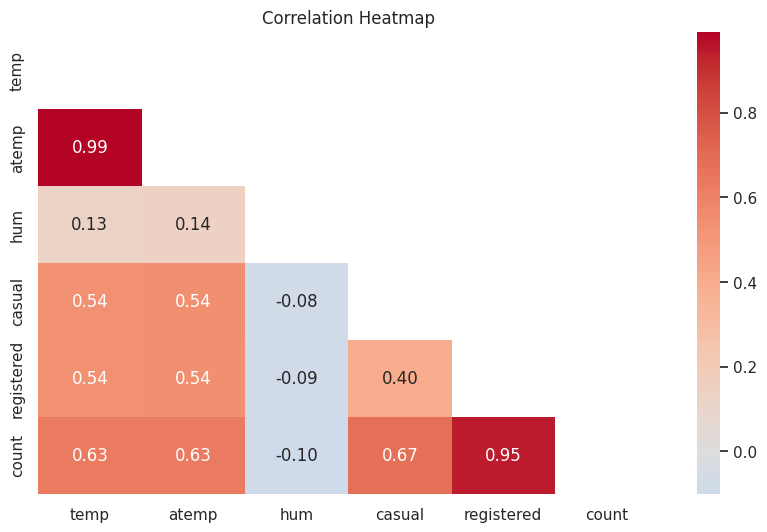

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Berdasarkan Correlation Heatmap diatas, kita dapat melihat hasil analisis yaitu sebagai berikut:

* atemp dan temp sangat berkorelasi (0.99).
* hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
* casual cukup berkorelasi dengan temp dan atemp (0.54), dan sedikit negatif dengan hum (-0.08).
* registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.40).
* count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum (-0.10).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada korelasi antara kondisi cuaca dan aktivitas penggunaan sepeda?

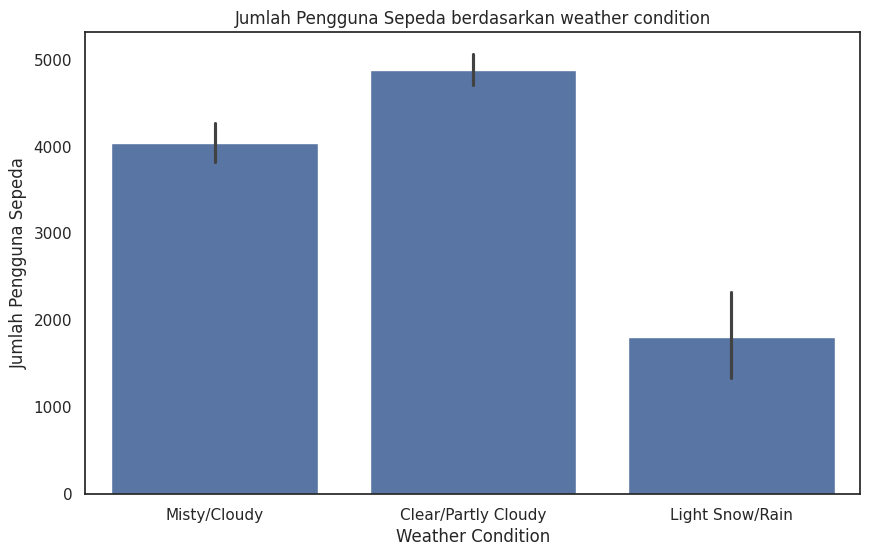

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_condition',
    y='count',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan weather condition')
plt.xlabel('Weather Condition')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan boxplot diatas dapat kita simpulkan bahwa terdapat hubungan antara weather condition dan pengguna sepeda. Cuaca yang paling diminati oleh pengguna sepeda adalah Clear/Partly Cloudy. Kemudian dilanjuti oleh cuaca misty/cloudy dan paling sedikit saat cuaca light snow/rain.

### Pertanyaan 2: Apakah terdapat perbedaan yang signifikan dalam frekuensi penggunaan sepeda antara hari kerja, hari libur, dan hari biasa?


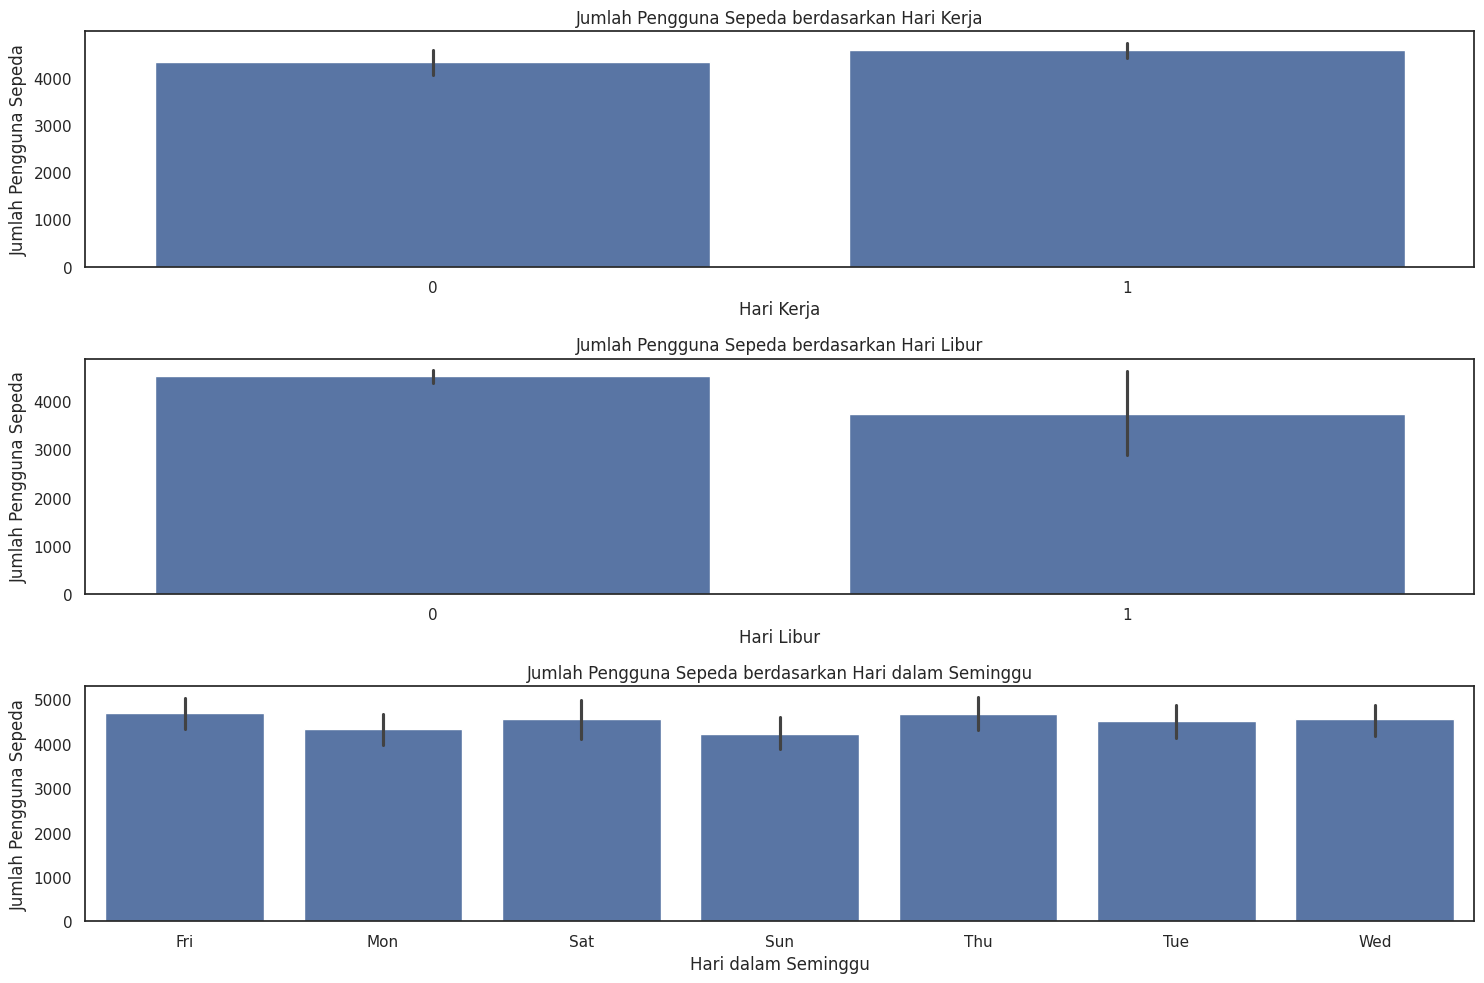

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()



Berdasarkan barplot diatas kita dapat menyimpulkan beberapa hal antara lain yaitu :

* Jumlah pengguna sepeda lebih banyak pada hari kerja (yakni senin - jumat) daripada akhir pekan (yakni sabtu dan minggu).

* Jumlah pengguna sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur.

* Jumlah penyewa sepeda pada hari Jumat ialah yang menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak, dan hari Minggu menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.

### Pertanyaan 3: Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

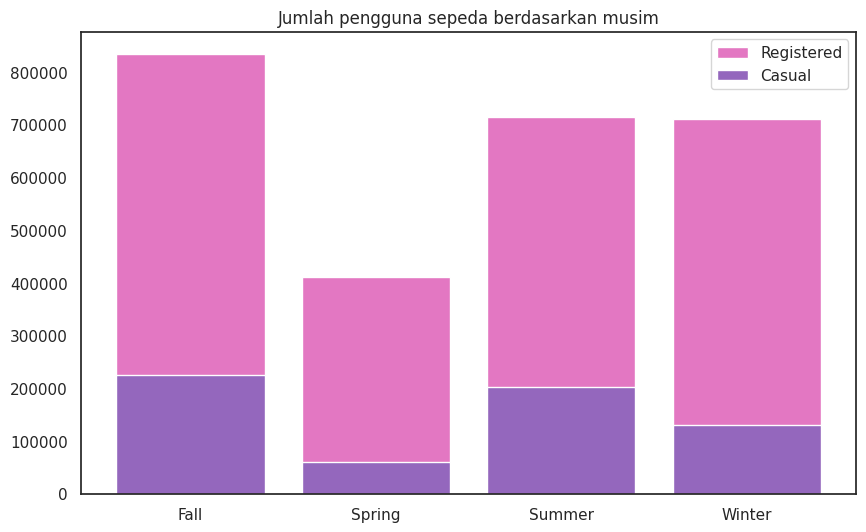

In [34]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:pink'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:purple'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah pengguna sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan barplot daiatas dapat kitadisimpulkan bahwa di semua musim yang paling dinikmati bagi para pengguna sepeda (Casual dan Registered) adalah musim gugur (Fall), lalu diikuti dengan musim panas (Summer), musim dingin (Winter), dan diakhiri dengan musim semi (Spring).

### Pertanyaan 4: Bagaimana perbandingan tren penggunaan sepeda antara pada tahun 2011 dan 2012?

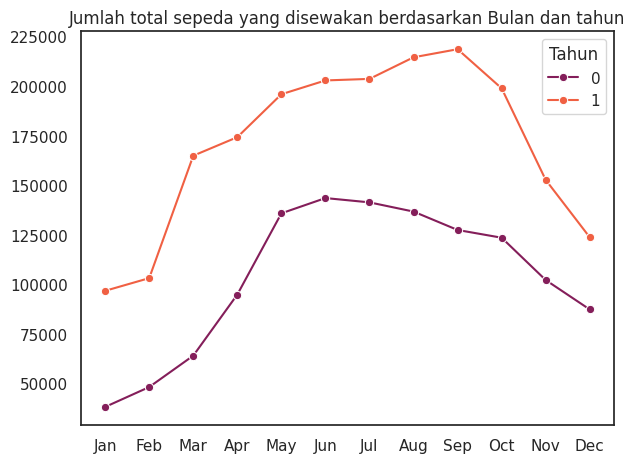

In [33]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()


Berdasarkan lineplot diatas dapat disimpulkan bahwa tahun 2012 (yang diwakili oleh angka 1) lebih unggul baik dari januari sampai desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari.

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan hasil analisis yang telah kita lakukan, disimpulkan bahwa terdapat korelasi antara kondisi cuaca dan aktivitas penggunaan sepeda. Yangmana Cuaca Clear/Partly Cloudy paling diminati oleh pengguna sepeda dengan Q3 diatas 6000 dan Q1 kurang dari 4000 serta mediannya hampir 5000. dilanjuti oleh cuaca misty/cloudy dengan Q3 diatas 5000 dan Q1 dibawah 3000 serta mediannya diatas 4000. dan paling sedikit saat cuaca light snow/rain dengan Q3 diatas 2000 dan Q1 dibawah 1000 serta mediannya diatas 1000. Dan untuk cuaca ketika Severe Weather tidak ada datanya, karena memang tidak memungkinan untuk bersepeda ketika Severe Weather.

- Conclution pertanyaan 2 :
Berdasarkan analisis data, dapat disimpulkan bahwa pola penggunaan sepeda dipengaruhi oleh beberapa faktor, termasuk hari kerja, hari libur, dan hari dalam seminggu. Meskipun perbedaan antara penggunaan sepeda pada hari kerja dan hari libur tidak terlalu signifikan, penggunaan sepeda cenderung lebih tinggi pada hari kerja daripada pada hari libur. Selain itu, terdapat perbedaan yang cukup besar antara jumlah penggunaan sepeda pada hari-hari non-holiday dan holiday, dengan penggunaan sepeda lebih tinggi pada hari-hari non-holiday. Analisis juga menunjukkan bahwa dalam sepekan, jumlah pengguna sepeda tertinggi terjadi pada hari Jumat, sementara jumlah penggunaan sepeda terendah terjadi pada hari Minggu. Hal ini mengindikasikan bahwa preferensi pengguna sepeda cenderung lebih tinggi pada hari-hari biasa daripada pada akhir pekan.

- Conclution pertanyaan 3 :
Berdasarkan analisis data, dapat disimpulkan bahwa musim semi (Spring) bukanlah musim yang memiliki tingkat penyewaan sepeda terendah, melainkan musim semi (Spring) menempati peringkat terakhir dalam hal jumlah penyewaan sepeda. Hal ini mungkin dipengaruhi oleh berbagai faktor seperti kondisi cuaca yang mungkin tidak optimal, perubahan suhu udara, pola hari kerja, dan hari libur. Sebaliknya, musim gugur (Fall) menjadi musim dengan tingkat penyewaan sepeda tertinggi, mencapai lebih dari 800.000 penyewaan. Faktor-faktor seperti warna-warni dedaunan, suhu yang nyaman, dan perubahan pola aktivitas masyarakat mungkin berperan dalam meningkatkan penggunaan sepeda pada musim gugur. Dalam konteks ini, analisis data memberikan pemahaman yang lebih dalam tentang preferensi penggunaan sepeda berdasarkan musim, yang dapat menjadi informasi berharga bagi penyedia layanan sepeda dan pengambil keputusan dalam pengelolaan sumber daya.

- Conclution pertanyaan 4 : Berdasarkan visualisasi data yang disajikan, terdapat perbedaan dalam pola puncak dan dasar bulan antara tahun 2011 dan 2012. Pada tahun 2011, puncak terjadi pada bulan Juni sementara dasarnya terjadi pada bulan Januari. Namun, pada tahun 2012, puncak terjadi pada bulan September dengan dasar yang tetap berada pada bulan Januari. Selain itu, jumlah total sepeda yang disewakan pada tahun 2012 secara keseluruhan lebih tinggi daripada pada tahun 2011. Dengan demikian, dapat disimpulkan bahwa terjadi peningkatan penggunaan sepeda yang signifikan dari tahun 2011 ke tahun 2012.

